<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-998372440.py:20: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("auto-mpg.data", sep="\s+", names=columns, na_values="?")


🔹 Performance of Custom Decision Tree:
RMSE: 3.192, MAE: 2.275, R²: 0.800

🔹 Performance of Sklearn DecisionTreeRegressor:
RMSE: 3.307, MAE: 2.303, R²: 0.786


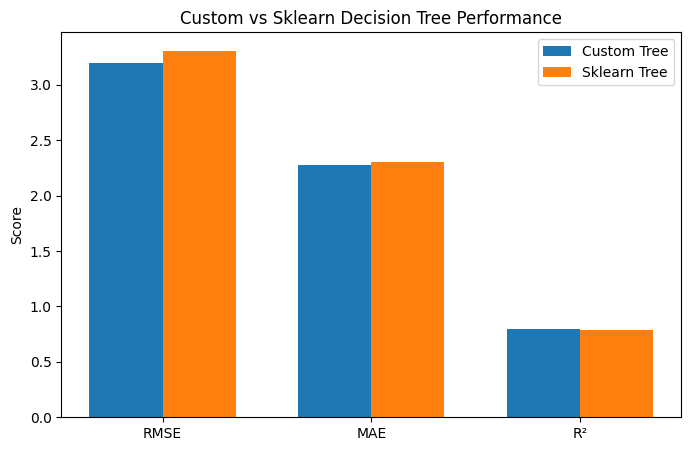

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from base import DecisionTree
from metrics import *

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight",
           "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv("auto-mpg.data", sep="\s+", names=columns, na_values="?")
df = df.dropna()

X = df.drop(columns=["mpg", "car_name"])
y = df["mpg"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


custom_tree = DecisionTree(criterion="information_gain", max_depth=5)

custom_tree.fit(X_train, y_train)
y_pred_custom = custom_tree.predict(X_test)


rmse_custom = np.sqrt(mean_squared_error(y_test, y_pred_custom))
mae_custom = mean_absolute_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

print("🔹 Performance of Custom Decision Tree:")
print(f"RMSE: {rmse_custom:.3f}, MAE: {mae_custom:.3f}, R²: {r2_custom:.3f}")


sk_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
sk_tree.fit(X_train, y_train)
y_pred_sk = sk_tree.predict(X_test)

rmse_sk = np.sqrt(mean_squared_error(y_test, y_pred_sk))
mae_sk = mean_absolute_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("\n🔹 Performance of Sklearn DecisionTreeRegressor:")
print(f"RMSE: {rmse_sk:.3f}, MAE: {mae_sk:.3f}, R²: {r2_sk:.3f}")


import matplotlib.pyplot as plt

metrics_names = ["RMSE", "MAE", "R²"]
custom_scores = [rmse_custom, mae_custom, r2_custom]
sklearn_scores = [rmse_sk, mae_sk, r2_sk]

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, custom_scores, width, label="Custom Tree")
ax.bar(x + width/2, sklearn_scores, width, label="Sklearn Tree")

ax.set_ylabel("Score")
ax.set_title("Custom vs Sklearn Decision Tree Performance")
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
plt.show()


Q.4

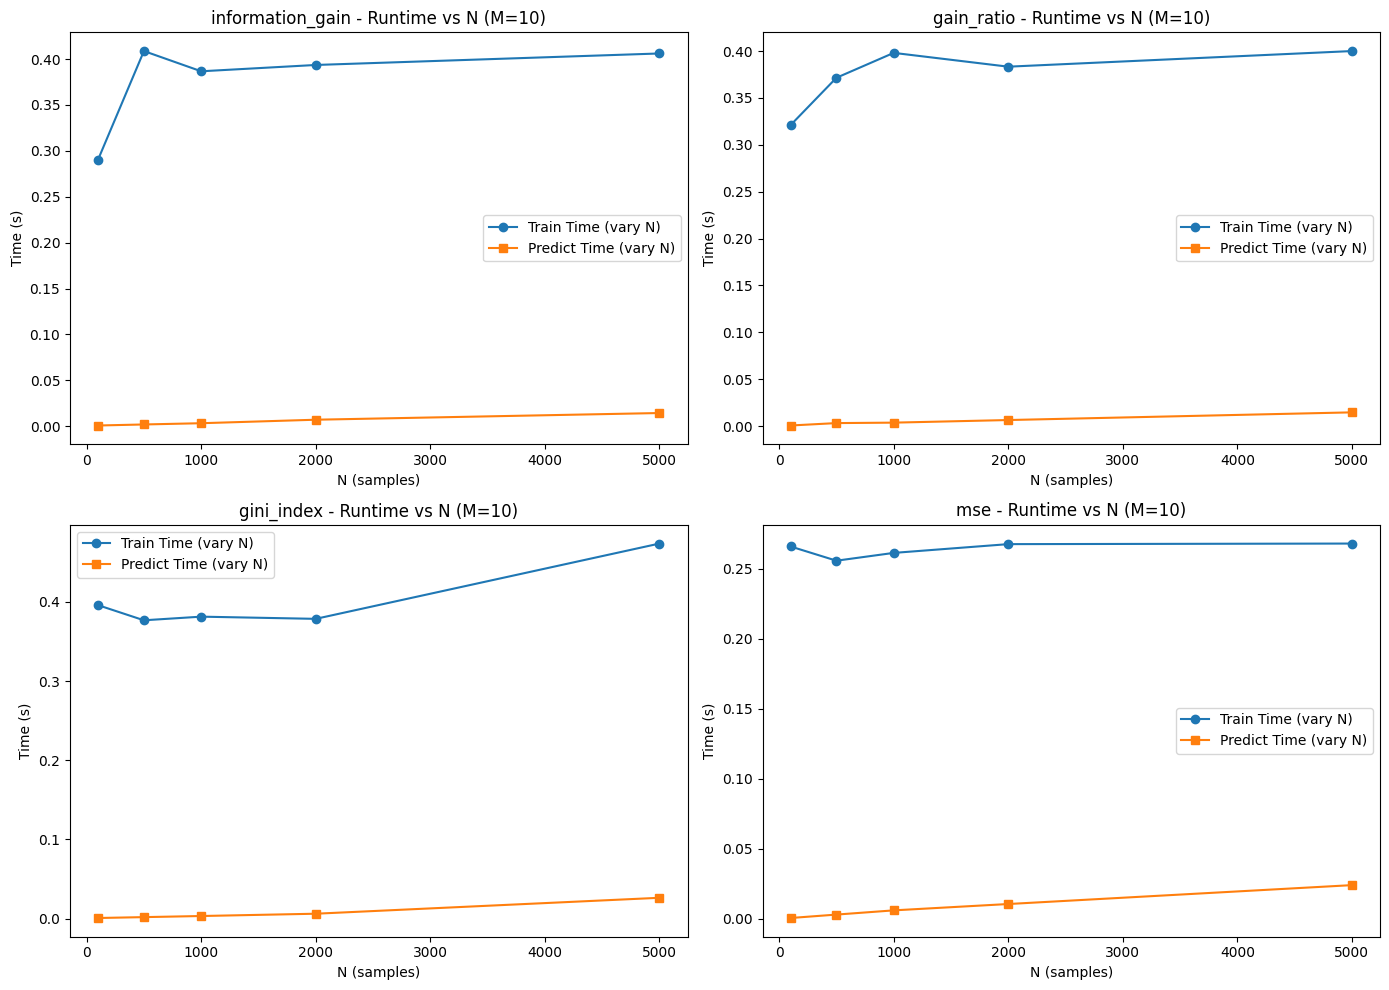

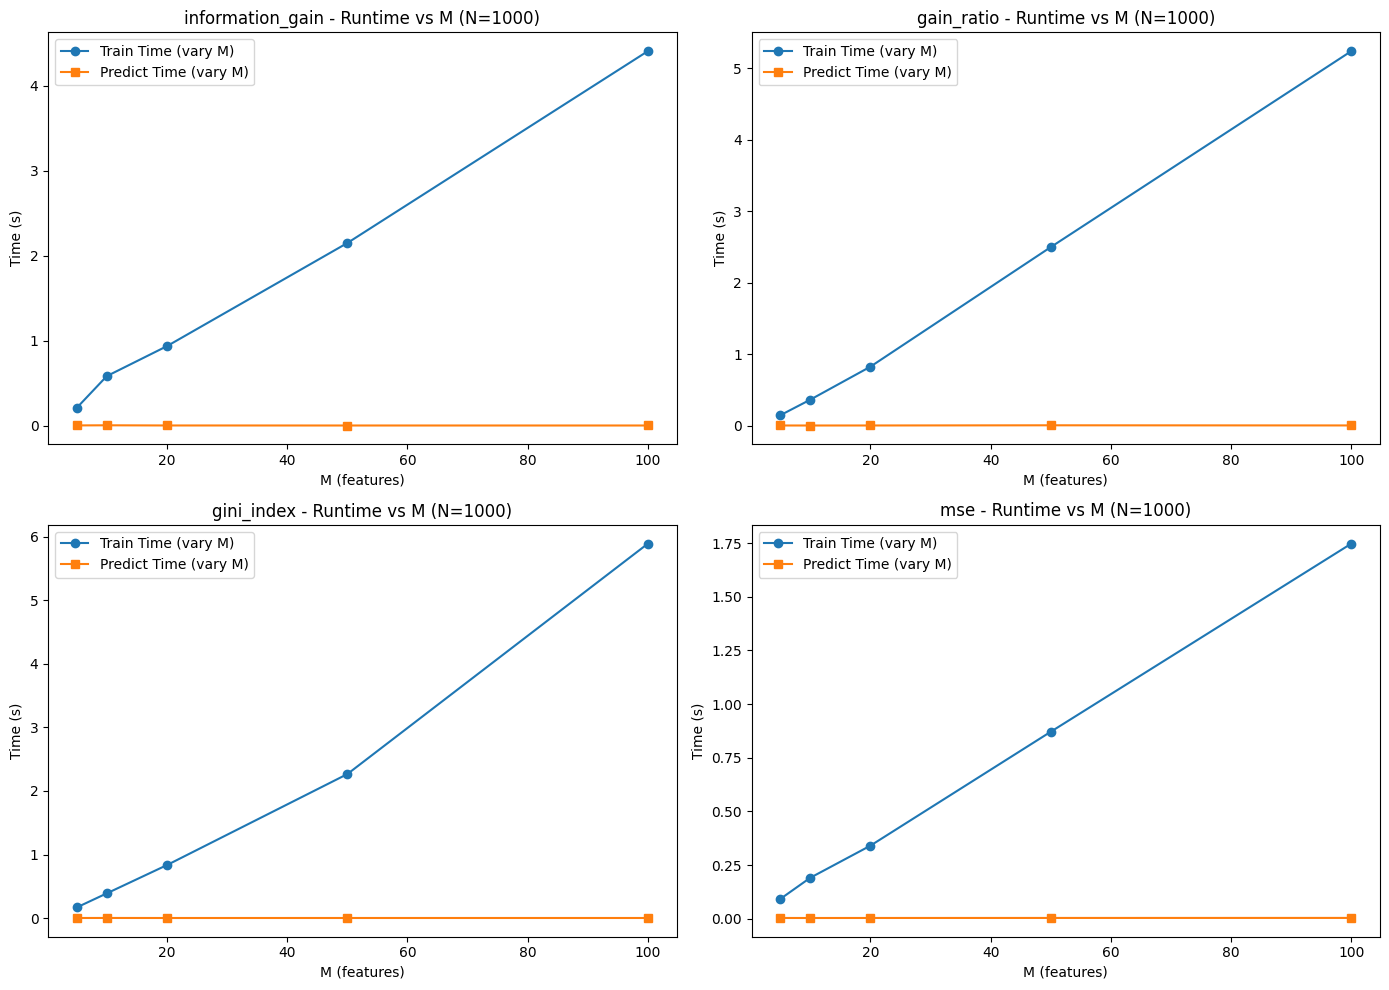


=== INFORMATION_GAIN Results (varying N, M) ===

-- Runtime vs N --
   N  Train Time  Predict Time
 100    0.290502      0.000731
 500    0.408731      0.001858
1000    0.386688      0.003218
2000    0.393571      0.007034
5000    0.406101      0.014318

-- Runtime vs M --
  M  Train Time  Predict Time
  5    0.210212      0.004251
 10    0.583727      0.005696
 20    0.935992      0.003651
 50    2.148566      0.003284
100    4.405518      0.003336

=== GAIN_RATIO Results (varying N, M) ===

-- Runtime vs N --
   N  Train Time  Predict Time
 100    0.321051      0.000678
 500    0.371513      0.003246
1000    0.398070      0.003728
2000    0.383348      0.006499
5000    0.400014      0.014694

-- Runtime vs M --
  M  Train Time  Predict Time
  5    0.145245      0.003280
 10    0.363636      0.003141
 20    0.824899      0.003417
 50    2.496743      0.005974
100    5.237044      0.003868

=== GINI_INDEX Results (varying N, M) ===

-- Runtime vs N --
   N  Train Time  Predict Time
 1

In [ ]:

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from base import DecisionTree
from sklearn.model_selection import train_test_split


def generate_data(N, M, regression=False):
    """Generate dataset with N samples and M binary features."""
    X = pd.DataFrame(np.random.randint(0, 2, size=(N, M)),
                     columns=[f"f{i}" for i in range(M)])
    if regression:
        y = np.random.randn(N)
    else:
        y = np.random.randint(0, 2, size=N)
    return X, pd.Series(y)


def run_experiment(N_values, M_values, criteria, max_depth=5):
    results = {crit: {"train_N": [], "pred_N": [], "train_M": [], "pred_M": []}
               for crit in criteria}


    M_fixed = 10
    for crit in criteria:
        for N in N_values:
            X, y = generate_data(N, M_fixed, regression=(crit=="mse"))
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            tree = DecisionTree(criterion=crit, max_depth=max_depth)

            start = time.time()
            tree.fit(X_train, y_train)
            results[crit]["train_N"].append(time.time() - start)

            start = time.time()
            tree.predict(X_test)
            results[crit]["pred_N"].append(time.time() - start)


    N_fixed = 1000
    for crit in criteria:
        for M in M_values:
            X, y = generate_data(N_fixed, M, regression=(crit=="mse"))
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            tree = DecisionTree(criterion=crit, max_depth=max_depth)

            start = time.time()
            tree.fit(X_train, y_train)
            results[crit]["train_M"].append(time.time() - start)

            start = time.time()
            tree.predict(X_test)
            results[crit]["pred_M"].append(time.time() - start)

    return results


N_values = [100, 500, 1000, 2000, 5000]
M_values = [5, 10, 20, 50, 100]

criteria = ["information_gain", "gain_ratio", "gini_index", "mse"]
results = run_experiment(N_values, M_values, criteria)


fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for idx, crit in enumerate(criteria):
    ax = axes[idx]
    ax.plot(N_values, results[crit]["train_N"], marker="o", label="Train Time (vary N)")
    ax.plot(N_values, results[crit]["pred_N"], marker="s", label="Predict Time (vary N)")
    ax.set_xlabel("N (samples)")
    ax.set_ylabel("Time (s)")
    ax.set_title(f"{crit} - Runtime vs N (M=10)")
    ax.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for idx, crit in enumerate(criteria):
    ax = axes[idx]
    ax.plot(M_values, results[crit]["train_M"], marker="o", label="Train Time (vary M)")
    ax.plot(M_values, results[crit]["pred_M"], marker="s", label="Predict Time (vary M)")
    ax.set_xlabel("M (features)")
    ax.set_ylabel("Time (s)")
    ax.set_title(f"{crit} - Runtime vs M (N=1000)")
    ax.legend()

plt.tight_layout()
plt.show()


for crit in criteria:
    print(f"\n=== {crit.upper()} Results (varying N, M) ===")
    df_N = pd.DataFrame({"N": N_values, "Train Time": results[crit]["train_N"], "Predict Time": results[crit]["pred_N"]})
    df_M = pd.DataFrame({"M": M_values, "Train Time": results[crit]["train_M"], "Predict Time": results[crit]["pred_M"]})
    print("\n-- Runtime vs N --")
    print(df_N.to_string(index=False))
    print("\n-- Runtime vs M --")
    print(df_M.to_string(index=False))
